# **Library**

In [ ]:
!pip install nltk
!pip install gensim
!pip install pyLDAvis
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 28.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


# **Import Package**

In [ ]:
import pandas as pd
import numpy as np
import spacy
import gensim
import nltk
import matplotlib.pyplot as plt
import pyLDAvis.gensim
import re
from tqdm import tqdm
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from gensim.models.phrases import Phrases
from nltk.corpus import wordnet
from nltk import SnowballStemmer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from google.colab import drive

# Data Visualization
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


# **Donwload NLTK**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Dataset**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive/')
# Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/dataset_kaggle.csv'
data = pd.read_csv(path)
# Menampilkan beberapa baris data pertama
data.head()

Mounted at /content/drive/


,userName,content,score,at
0,H G,Unable to use it as it won't work with my Goog...,1,2021-01-11 01:12:58
1,Michelle Armstrong,I downloaded this because of the cross platfor...,1,2020-12-22 18:31:11
2,Yiğitcan Sümbelli,I am starting to hate this app! Every time the...,1,2020-12-02 15:52:24
3,Jon Pember,"Liked Any.do at first, enough that I even sign...",1,2020-11-22 23:42:56
4,Harry Wexler Jr. MBA,They made me sign up for premium just to have ...,1,2020-12-31 01:49:52


In [ ]:
data = data[['content']]
data.head()

,content
0,Unable to use it as it won't work with my Goog...
1,I downloaded this because of the cross platfor...
2,I am starting to hate this app! Every time the...
3,"Liked Any.do at first, enough that I even sign..."
4,They made me sign up for premium just to have ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16388 entries, 0 to 16387
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  16388 non-null  object
dtypes: object(1)
memory usage: 128.2+ KB


# **Preprocessing**

## Data Cleaning

In [ ]:
def clean_text(content):
    if isinstance(content, str):
        # Menghapus spasi berlebihan
        content = re.sub(r'\s+', ' ', content)

        # Menghapus emoji
        content = re.sub(r':[^:]+:', '', content)

        # Menghapus hashtag
        content = re.sub(r'#\w+', '', content)

        # Menghapus mention
        content = re.sub(r'@[A-Za-z0-9]+', '', content)

        # Menghapus URL
        content = re.sub(r'https?://[A-Za-z0-9./]+', '', content)

        # Menghapus karakter selain huruf dan spasi
        content = re.sub(r'[^A-Za-z\s]', '', content)

        # Menghapus tanggal, angka, dan datetime
        content = re.sub(r'\b\d{1,2}[-/.]\d{1,2}[-/.]\d{2,4}\b', '', content)  # Menghapus tanggal
        content = re.sub(r'\b\d+\b', '', content)  # Menghapus angka
        content = re.sub(r'\b\d{1,2}:\d{1,2}(:\d{1,2})?\b', '', content)  # Menghapus format waktu

        # Menghilangkan tanda baca tambahan
        content = re.sub(r'[^\w\s]', '', content)

        return content.strip()
    else:
        return ""

# Contoh penggunaan pada DataFrame
tqdm.pandas()
data['clean_content'] = data['content'].progress_apply(lambda x: clean_text(x))

# Menghapus data kosong setelah proses pembersihan
data.dropna(subset=['clean_content'], inplace=True)
data.head()



100%|██████████| 16388/16388 [00:00<00:00, 20750.27it/s]


,content,clean_content
0,Unable to use it as it won't work with my Goog...,Unable to use it as it wont work with my Googl...
1,I downloaded this because of the cross platfor...,I downloaded this because of the cross platfor...
2,I am starting to hate this app! Every time the...,I am starting to hate this app Every time they...
3,"Liked Any.do at first, enough that I even sign...",Liked Anydo at first enough that I even signed...
4,They made me sign up for premium just to have ...,They made me sign up for premium just to have ...


## Case Folding

In [ ]:
# Fungsi untuk membuat teks menjadi huruf kecil
def lowercase_text(content):
    if isinstance(content, str):
        return content.lower()
    else:
        return ""

tqdm.pandas()
data['lower_content'] = data['clean_content'].progress_apply(lambda x: lowercase_text(x))

# Menghapus data kosong setelah proses pembersihan
data.dropna(subset=['lower_content'], inplace=True)
data.head()

100%|██████████| 16388/16388 [00:00<00:00, 583059.10it/s]


,content,clean_content,lower_content
0,Unable to use it as it won't work with my Goog...,Unable to use it as it wont work with my Googl...,unable to use it as it wont work with my googl...
1,I downloaded this because of the cross platfor...,I downloaded this because of the cross platfor...,i downloaded this because of the cross platfor...
2,I am starting to hate this app! Every time the...,I am starting to hate this app Every time they...,i am starting to hate this app every time they...
3,"Liked Any.do at first, enough that I even sign...",Liked Anydo at first enough that I even signed...,liked anydo at first enough that i even signed...
4,They made me sign up for premium just to have ...,They made me sign up for premium just to have ...,they made me sign up for premium just to have ...


## Tokenizing

In [ ]:
# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Define a concise tokenize function using lambda
tokenize_text = lambda text: [token.text for token in nlp(text)]

# Apply tokenization with tqdm for progress monitoring
tqdm.pandas()
data['tokens_content'] = data['lower_content'].progress_apply(tokenize_text)

# Menghapus data kosong setelah proses pembersihan
data.dropna(subset=['tokens_content'], inplace=True)
data.head()

100%|██████████| 16388/16388 [03:37<00:00, 75.41it/s]


,content,clean_content,lower_content,tokens_content
0,Unable to use it as it won't work with my Goog...,Unable to use it as it wont work with my Googl...,unable to use it as it wont work with my googl...,"[unable, to, use, it, as, it, wo, nt, work, wi..."
1,I downloaded this because of the cross platfor...,I downloaded this because of the cross platfor...,i downloaded this because of the cross platfor...,"[i, downloaded, this, because, of, the, cross,..."
2,I am starting to hate this app! Every time the...,I am starting to hate this app Every time they...,i am starting to hate this app every time they...,"[i, am, starting, to, hate, this, app, every, ..."
3,"Liked Any.do at first, enough that I even sign...",Liked Anydo at first enough that I even signed...,liked anydo at first enough that i even signed...,"[liked, anydo, at, first, enough, that, i, eve..."
4,They made me sign up for premium just to have ...,They made me sign up for premium just to have ...,they made me sign up for premium just to have ...,"[they, made, me, sign, up, for, premium, just,..."


## Stopword

In [ ]:
stop_words = set(stopwords.words("english"))
stop_words.update(['nan','i','hi', 'im', 'ive', 'go', 'pp', 'jek',
                   'monthsthis', 'busyomgfor', 'ojek', 'appit', 'youve',
                   'gonna', 'wanna', 'gotta', 'kinda', 'dunno', 'lemme'])

def remove_stopwords(tokens):
  return [token for token in tokens if token not in stop_words]

tqdm.pandas()
data['stopwords_content'] = data['tokens_content'].progress_apply(remove_stopwords)

# Menghapus data kosong setelah proses pembersihan
data.dropna(subset=['stopwords_content'], inplace=True)
data.head()

100%|██████████| 16388/16388 [00:00<00:00, 34866.86it/s]


,content,clean_content,lower_content,tokens_content,stopwords_content
0,Unable to use it as it won't work with my Goog...,Unable to use it as it wont work with my Googl...,unable to use it as it wont work with my googl...,"[unable, to, use, it, as, it, wo, nt, work, wi...","[unable, use, wo, nt, work, google, calendar, ..."
1,I downloaded this because of the cross platfor...,I downloaded this because of the cross platfor...,i downloaded this because of the cross platfor...,"[i, downloaded, this, because, of, the, cross,...","[downloaded, cross, platform, syncing, purchas..."
2,I am starting to hate this app! Every time the...,I am starting to hate this app Every time they...,i am starting to hate this app every time they...,"[i, am, starting, to, hate, this, app, every, ...","[starting, hate, app, every, time, update, sta..."
3,"Liked Any.do at first, enough that I even sign...",Liked Anydo at first enough that I even signed...,liked anydo at first enough that i even signed...,"[liked, anydo, at, first, enough, that, i, eve...","[liked, anydo, first, enough, even, signed, pr..."
4,They made me sign up for premium just to have ...,They made me sign up for premium just to have ...,they made me sign up for premium just to have ...,"[they, made, me, sign, up, for, premium, just,...","[made, sign, premium, recurring, alerts, nt, e..."


## Lemmatization Data

In [ ]:
# Load model 'en_core_web_sm' from spaCy and disable parser and NER components
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define lemmatization function
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in tqdm(texts, desc="Lemmatizing"):
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Perform lemmatization with tqdm for progress monitoring
tqdm.pandas()
lemmatized_content = lemmatization(data['stopwords_content'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Update DataFrame with lemmatized content
data['lemmatized_content'] = lemmatized_content
data.dropna(subset=['lemmatized_content'], inplace=True)

# Menggabungkan kata-kata unigram menjadi satu teks utuh
data['ulasan'] = data['lemmatized_content'].apply(lambda x: ' '.join(x))
data.dropna(subset=['ulasan'], inplace=True)
data.head()

Lemmatizing: 100%|██████████| 16388/16388 [01:13<00:00, 223.53it/s]


,content,clean_content,lower_content,tokens_content,stopwords_content,lemmatized_content,ulasan
0,Unable to use it as it won't work with my Goog...,Unable to use it as it wont work with my Googl...,unable to use it as it wont work with my googl...,"[unable, to, use, it, as, it, wo, nt, work, wi...","[unable, use, wo, nt, work, google, calendar, ...","[unable, use, work, calendar, tech, support, h...",unable use work calendar tech support horrible...
1,I downloaded this because of the cross platfor...,I downloaded this because of the cross platfor...,i downloaded this because of the cross platfor...,"[i, downloaded, this, because, of, the, cross,...","[downloaded, cross, platform, syncing, purchas...","[download, cross, platform, sync, purchase, ap...",download cross platform sync purchase app lear...
2,I am starting to hate this app! Every time the...,I am starting to hate this app Every time they...,i am starting to hate this app every time they...,"[i, am, starting, to, hate, this, app, every, ...","[starting, hate, app, every, time, update, sta...","[start, app, time, update, start, exact, probl...",start app time update start exact problem edit...
3,"Liked Any.do at first, enough that I even sign...",Liked Anydo at first enough that I even signed...,liked anydo at first enough that i even signed...,"[liked, anydo, at, first, enough, that, i, eve...","[liked, anydo, first, enough, even, signed, pr...","[like, anydo, first, enough, even, sign, premi...",like anydo first enough even sign premium sche...
4,They made me sign up for premium just to have ...,They made me sign up for premium just to have ...,they made me sign up for premium just to have ...,"[they, made, me, sign, up, for, premium, just,...","[made, sign, premium, recurring, alerts, nt, e...","[make, sign, premium, recur, alert, even, hour...",make sign premium recur alert even hourly opti...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16388 entries, 0 to 16387
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   content             16388 non-null  object
 1   clean_content       16388 non-null  object
 2   lower_content       16388 non-null  object
 3   tokens_content      16388 non-null  object
 4   stopwords_content   16388 non-null  object
 5   lemmatized_content  16388 non-null  object
 6   ulasan              16388 non-null  object
dtypes: object(7)
memory usage: 896.3+ KB


In [ ]:
# Simpan DataFrame ke dalam file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/preprocessing_data_kaggle.csv'
data.to_csv(path, index=False)


# **Pemodelan Topic / Aspek**


In [ ]:
# Baca file CSV dari Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/preprocessing_data_kaggle.csv'
data = pd.read_csv(path)

# Hapus baris yang memiliki nilai NaN di kolom 'ulasan'
data = data.dropna(subset=['ulasan'])

# Ubah tipe data kolom 'ulasan' menjadi string
data['ulasan'] = data['ulasan'].astype(str)

# Split setiap ulasan menjadi daftar kata
lemmatized_content = [text.split() for text in data['ulasan']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16155 entries, 0 to 16387
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   content             16155 non-null  object
 1   clean_content       16155 non-null  object
 2   lower_content       16155 non-null  object
 3   tokens_content      16155 non-null  object
 4   stopwords_content   16155 non-null  object
 5   lemmatized_content  16155 non-null  object
 6   ulasan              16155 non-null  object
dtypes: object(7)
memory usage: 1009.7+ KB


## Bag Of Words

In [ ]:
# Membuat kamus (dictionary)
id2word = corpora.Dictionary(lemmatized_content)

# Membuat Corpus
corpus = lemmatized_content

# Term document frequency dari corpus
bow_corpus = [id2word.doc2bow(text) for text in corpus]

# View
print(corpus[:1])
print(bow_corpus[:1])
id2word[0]

[['unable', 'use', 'work', 'calendar', 'tech', 'support', 'horrible', 'talus', 'keep', 'ask', 'screenshot', 'native', 'calendar', 'think', 'come', 'phone', 'edge', 'thus', 'get', 'refuse', 'escalate', 'request', 'help', 'high', 'level', 'edit', 'team', 'copy', 'chat', 'explain', 'native', 'calendar', 'app', 'know', 'case', 'review', 'area', 'dept', 'tiny', 'really', 'want', 'buggy', 'app', 'advertise', 'work', 'well']]
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2)]]


'advertise'

## Model LDA

Num Topics = 2  has Coherence Value of 0.51
Num Topics = 3  has Coherence Value of 0.511
Num Topics = 4  has Coherence Value of 0.469


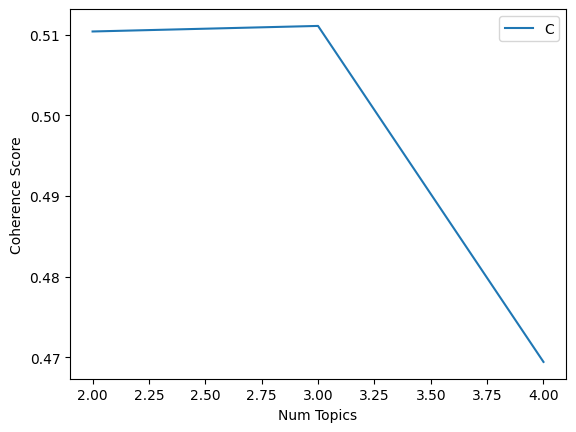

In [ ]:
# Fungsi untuk menghitung nilai coherence dari topic LDA
def compute_coherence_values(dictionary, bow_corpus, corpus, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                                num_topics=num_topics,
                                                id2word=id2word,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=corpus, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

limit = 5
start = 2
step = 1
model_list, coherence_values = compute_coherence_values(id2word, bow_corpus, corpus, limit, start, step)

# Menampilkan grafik coherence score dan num topics
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("Coherence Values"), loc='best')

# Menampilkan nilai koherensi untuk setiap jumlah topik
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))
plt.show()


## Visualisasi dan Interpretasi Topic

In [ ]:
# Choose the model with the highest coherence value
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_model_index]

# Visualize the topics of the optimal model
pyLDAvis.enable_notebook()
vis_topic = pyLDAvis.gensim.prepare(optimal_model, bow_corpus, id2word)
vis_topic


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.260446 -0.211973       1        1  37.228085
0     -0.324807 -0.106804       2        1  35.713141
1      0.064361  0.318776       3        1  27.058774, topic_info=         Term         Freq        Total Category  logprob  loglift
1         app  9204.000000  9204.000000  Default  30.0000  30.0000
37        use  6279.000000  6279.000000  Default  29.0000  29.0000
115      task  4520.000000  4520.000000  Default  28.0000  28.0000
191      good  3080.000000  3080.000000  Default  27.0000  27.0000
5    calendar  4849.000000  4849.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
100      like   528.484094   541.998417   Topic3  -4.8731   1.2819
123     recur   417.208459   424.665848   Topic3  -5.1096   1.2894
122    option   528.918995  1207.533326   Topic3  -4.8723   0.4817
38       want   484.402725  1177.054669   Topic3  -4.9602   0.4193
5    calendar   462.464911  4849.734079   Topic3  -5.0066  -1.0429

[148 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
284       2  0.998201      able
158       1  0.997795   account
158       3  0.001911   account
575       3  0.997532  actually
523       1  0.000594        ad
...     ...       ...       ...
396       2  0.001457      wish
40        1  0.999557      work
156       1  0.013787      year
156       2  0.065174      year
156       3  0.921206      year

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [ ]:
num_topics = optimal_model.num_topics

for topic_id in range(num_topics):
    print(f"Topik {topic_id + 1}:")
    topic_keywords = optimal_model.show_topic(topic_id, topn=20)
    print(', '.join([word for word, _ in topic_keywords]))
    print()


Topik 1:
app, use, great, love, planner, well, need, easy, make, really, widget, list, update, thing, help, note, see, find, keep, nice

Topik 2:
good, version, ad, pay, feature, year, look, view, pro, free, schedule, many, appointment, simple, full, think, option, like, buy, lot

Topik 3:
task, calendar, work, event, time, day, get, phone, sync, add, show, try, change, set, even, reminder, still, new, fix, notification



## Penentuan Dominan Aspek Per Kalimat

In [ ]:
def format_topics_sent(ldamodel, corpus, texts, data_lemmatized):
    sent_topics_list = []
    for i, row in enumerate(ldamodel[corpus]):
        topic_num, prop_topic = max(row[0], key=lambda x: x[1])
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join(word for word, prop in wp)
        sent_topics_list.append([int(topic_num), round(prop_topic, 3), topic_keywords, data_lemmatized[i]])

    data = pd.DataFrame(sent_topics_list, columns=['Dominant_topic', 'Perc_Contrib', 'Topic_Keywords', 'Data_Lemmatized'])
    data['Content'] = texts
    return data

# Path untuk file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/preprocessing_data_kaggle.csv'

# Load data dari Google Drive
data = pd.read_csv(path)

# Drop baris dengan nilai kosong di kolom 'ulasan'
data = data.dropna(subset=['ulasan'])

# Ubah kolom 'ulasan' menjadi string
data['ulasan'] = data['ulasan'].astype(str)

# Ambil 'lemmatized_content' dan 'texts' setelah menghapus baris kosong
lemmatized_content = data['lemmatized_content'].tolist()
texts = data['ulasan'].tolist()

# Sekarang Anda dapat menggunakan fungsi dengan data yang telah dimuat
data = format_topics_sent(optimal_model, bow_corpus, texts, lemmatized_content)
data.head()


,Dominant_topic,Perc_Contrib,Topic_Keywords,Data_Lemmatized,Content
0,2,0.573,"task, calendar, work, event, time, day, get, p...","['unable', 'use', 'work', 'calendar', 'tech', ...",unable use work calendar tech support horrible...
1,2,0.362,"task, calendar, work, event, time, day, get, p...","['download', 'cross', 'platform', 'sync', 'pur...",download cross platform sync purchase app lear...
2,0,0.483,"app, use, great, love, planner, well, need, ea...","['start', 'app', 'time', 'update', 'start', 'e...",start app time update start exact problem edit...
3,1,0.528,"good, version, ad, pay, feature, year, look, v...","['like', 'anydo', 'first', 'enough', 'even', '...",like anydo first enough even sign premium sche...
4,2,0.412,"task, calendar, work, event, time, day, get, p...","['make', 'sign', 'premium', 'recur', 'alert', ...",make sign premium recur alert even hourly opti...


In [ ]:
# Membuat dictionary untuk menghubungkan nilai Dominant_topic dengan aspek yang sesuai
aspect_mapping = {
    # aspect kaggle
    0: 'User Experience ',
    1: 'Monetization',
    2: 'Task Management',

}

# Menggunakan dictionary untuk mengubah nilai Dominant_topic menjadi aspek yang sesuai
data['Aspect'] = data['Dominant_topic'].map(aspect_mapping)

# Display the updated DataFrame
data.head()

,Dominant_topic,Perc_Contrib,Topic_Keywords,Data_Lemmatized,Content,Aspect
0,2,0.573,"task, calendar, work, event, time, day, get, p...","['unable', 'use', 'work', 'calendar', 'tech', ...",unable use work calendar tech support horrible...,Task Management
1,2,0.362,"task, calendar, work, event, time, day, get, p...","['download', 'cross', 'platform', 'sync', 'pur...",download cross platform sync purchase app lear...,Task Management
2,0,0.483,"app, use, great, love, planner, well, need, ea...","['start', 'app', 'time', 'update', 'start', 'e...",start app time update start exact problem edit...,User Experience
3,1,0.528,"good, version, ad, pay, feature, year, look, v...","['like', 'anydo', 'first', 'enough', 'even', '...",like anydo first enough even sign premium sche...,Monetization
4,2,0.412,"task, calendar, work, event, time, day, get, p...","['make', 'sign', 'premium', 'recur', 'alert', ...",make sign premium recur alert even hourly opti...,Task Management


In [ ]:
data['Aspect'].value_counts()

Aspect
Task Management     7536
User Experience     6769
Monetization        1850
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dominant_topic   16155 non-null  int64  
 1   Perc_Contrib     16155 non-null  float32
 2   Topic_Keywords   16155 non-null  object 
 3   Data_Lemmatized  16155 non-null  object 
 4   Content          16155 non-null  object 
 5   Aspect           16155 non-null  object 
dtypes: float32(1), int64(1), object(4)
memory usage: 694.3+ KB


In [ ]:
# Drop rows with empty values
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dominant_topic   16155 non-null  int64  
 1   Perc_Contrib     16155 non-null  float32
 2   Topic_Keywords   16155 non-null  object 
 3   Data_Lemmatized  16155 non-null  object 
 4   Content          16155 non-null  object 
 5   Aspect           16155 non-null  object 
dtypes: float32(1), int64(1), object(4)
memory usage: 694.3+ KB


In [ ]:
# Simpan DataFrame ke dalam file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_aspek_kaggle.csv'
data.to_csv(path, index=False)

# **Pelabelan Sentimen Vader**

In [ ]:
# Path untuk file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_aspek_kaggle.csv'

# Load data dari Google Drive
vader = pd.read_csv(path)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_label_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']

    threshold_positive = 0.5  # Adjust these values as needed based on your data
    threshold_negative = -0.5

    if compound_score > threshold_positive:
        return 'Positive', compound_score
    elif compound_score < threshold_negative:
        return 'Negative', compound_score
    else:
        # Assign neutral sentiment to either positive or negative based on compound score
        if compound_score >= 0:
            return 'Positive', compound_score
        else:
            return 'Negative', compound_score

tqdm.pandas()
vader["Sentiment"], vader["Score"] = zip(*vader["Content"].progress_apply(sentiment_label_vader))

vader.head()


100%|██████████| 16155/16155 [03:51<00:00, 69.70it/s]


,Dominant_topic,Perc_Contrib,Topic_Keywords,Data_Lemmatized,Content,Aspect,Sentiment,Score
0,2,0.573,"task, calendar, work, event, time, day, get, p...","['unable', 'use', 'work', 'calendar', 'tech', ...",unable use work calendar tech support horrible...,Task Management,Positive,0.3384
1,2,0.362,"task, calendar, work, event, time, day, get, p...","['download', 'cross', 'platform', 'sync', 'pur...",download cross platform sync purchase app lear...,Task Management,Positive,0.5106
2,0,0.483,"app, use, great, love, planner, well, need, ea...","['start', 'app', 'time', 'update', 'start', 'e...",start app time update start exact problem edit...,User Experience,Negative,-0.6581
3,1,0.528,"good, version, ad, pay, feature, year, look, v...","['like', 'anydo', 'first', 'enough', 'even', '...",like anydo first enough even sign premium sche...,Monetization,Positive,0.0516
4,2,0.412,"task, calendar, work, event, time, day, get, p...","['make', 'sign', 'premium', 'recur', 'alert', ...",make sign premium recur alert even hourly opti...,Task Management,Positive,0.3612


In [ ]:
# Simpan DataFrame ke dalam file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_sentiment_vader_kaggle.csv'
vader.to_csv(path, index=False)

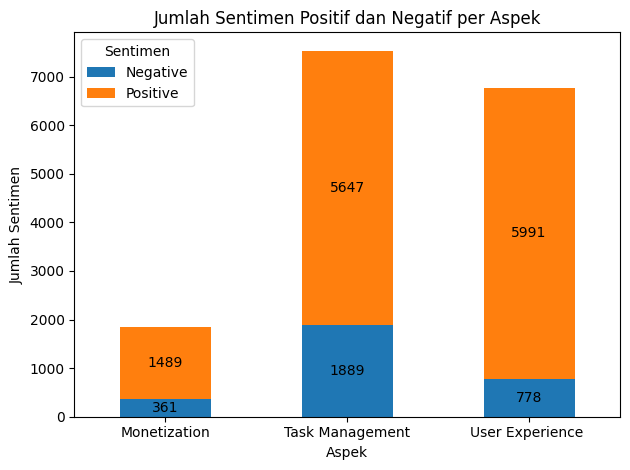

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah sentimen positif dan negatif berdasarkan aspek
sentiment_counts_by_aspect = vader.groupby(['Aspect', 'Sentiment']).size().unstack(fill_value=0)

# Buat bar chart
ax = sentiment_counts_by_aspect.plot(kind='bar', stacked=True)
plt.title('Jumlah Sentimen Positif dan Negatif per Aspek')
plt.xlabel('Aspek')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=0)  # Rotasi label x agar lebih mudah dibaca
plt.legend(title='Sentimen')

# Tambahkan label nilai di tengah setiap bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_x(), p.get_y()
    ax.annotate(f"{int(height)}", (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()


In [ ]:
vader['Sentiment'].value_counts()

Sentiment
Positive    13127
Negative     3028
Name: count, dtype: int64

In [ ]:
vader['Aspect'].value_counts()

Aspect
Task Management     7536
User Experience     6769
Monetization        1850
Name: count, dtype: int64

# **Pelabelan Sentimen Text Blob**

In [ ]:
# Path untuk file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_aspek_kaggle.csv'

# Load data dari Google Drive
blob = pd.read_csv(path)

In [ ]:
from textblob import TextBlob

def sentiment_label_textblob(text):
    analysis = TextBlob(text)
    polarity_score = analysis.sentiment.polarity

    threshold_positive = 0.5  # Adjust these values as needed based on your data
    threshold_negative = -0.5

    if polarity_score > threshold_positive:
        return 'Positive', polarity_score
    elif polarity_score < threshold_negative:
        return 'Negative', polarity_score
    else:
        # Assign neutral sentiment to either positive or negative based on polarity score
        if polarity_score >= 0:
            return 'Positive', polarity_score
        else:
            return 'Negative', polarity_score

tqdm.pandas()
blob["Sentiment"], blob["Score"] = zip(*blob["Content"].progress_apply(sentiment_label_textblob))

blob.head()


100%|██████████| 16155/16155 [00:05<00:00, 2752.85it/s]


,Dominant_topic,Perc_Contrib,Topic_Keywords,Data_Lemmatized,Content,Aspect,Sentiment,Score
0,2,0.573,"task, calendar, work, event, time, day, get, p...","['unable', 'use', 'work', 'calendar', 'tech', ...",unable use work calendar tech support horrible...,Task Management,Negative,-0.228000
1,2,0.362,"task, calendar, work, event, time, day, get, p...","['download', 'cross', 'platform', 'sync', 'pur...",download cross platform sync purchase app lear...,Task Management,Positive,0.080000
2,0,0.483,"app, use, great, love, planner, well, need, ea...","['start', 'app', 'time', 'update', 'start', 'e...",start app time update start exact problem edit...,User Experience,Negative,-0.020000
3,1,0.528,"good, version, ad, pay, feature, year, look, v...","['like', 'anydo', 'first', 'enough', 'even', '...",like anydo first enough even sign premium sche...,Monetization,Positive,0.087143
4,2,0.412,"task, calendar, work, event, time, day, get, p...","['make', 'sign', 'premium', 'recur', 'alert', ...",make sign premium recur alert even hourly opti...,Task Management,Positive,0.000000


In [ ]:
# Simpan DataFrame ke dalam file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_sentiment_blob_kaggle.csv'
blob.to_csv(path, index=False)

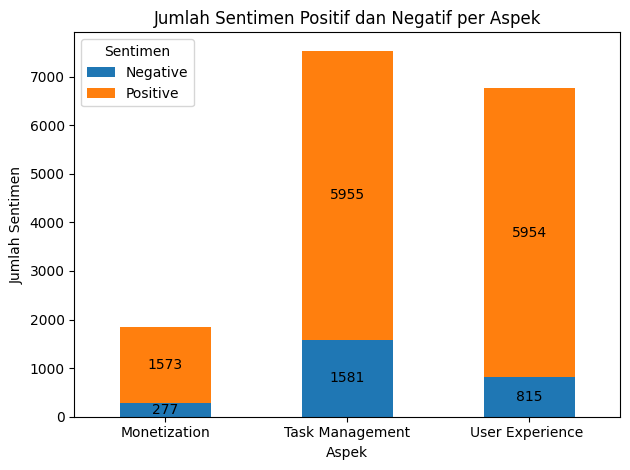

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah sentimen positif dan negatif berdasarkan aspek
sentiment_counts_by_aspect = blob.groupby(['Aspect', 'Sentiment']).size().unstack(fill_value=0)

# Buat bar chart
ax = sentiment_counts_by_aspect.plot(kind='bar', stacked=True)
plt.title('Jumlah Sentimen Positif dan Negatif per Aspek')
plt.xlabel('Aspek')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=0)  # Rotasi label x agar lebih mudah dibaca
plt.legend(title='Sentimen')

# Tambahkan label nilai di tengah setiap bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_x(), p.get_y()
    ax.annotate(f"{int(height)}", (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()


In [ ]:
blob['Aspect'].value_counts()

Aspect
Task Management     7536
User Experience     6769
Monetization        1850
Name: count, dtype: int64

In [ ]:
blob['Sentiment'].value_counts()

Sentiment
Positive    13482
Negative     2673
Name: count, dtype: int64

# **Pelabelan Sentimen BERT**

In [ ]:
# Path untuk file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_aspek_kaggle.csv'

# Load data dari Google Drive
bert = pd.read_csv(path)

In [ ]:
# Import libraries
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")

# Function to get sentiment using BERT model
def get_sentiment_bert(text):
    # Tokenize text
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    # Predict sentiment
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    score = torch.softmax(outputs.logits, dim=1)[0].tolist()  # Get softmax probabilities
    labels = ["Negative", "Positive"]  # Define labels
    return labels[predicted_class], score[predicted_class]

# Add "Sentiment" and "Score" columns to data
tqdm.pandas()  # Initialize tqdm on pandas
bert["Sentiment"], bert["Score"] = zip(*bert["Content"].progress_apply(get_sentiment_bert))

bert.head()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

100%|██████████| 16155/16155 [18:17<00:00, 14.72it/s]


,Dominant_topic,Perc_Contrib,Topic_Keywords,Data_Lemmatized,Content,Aspect,Sentiment,Score
0,2,0.573,"task, calendar, work, event, time, day, get, p...","['unable', 'use', 'work', 'calendar', 'tech', ...",unable use work calendar tech support horrible...,Task Management,Negative,0.998993
1,2,0.362,"task, calendar, work, event, time, day, get, p...","['download', 'cross', 'platform', 'sync', 'pur...",download cross platform sync purchase app lear...,Task Management,Negative,0.997258
2,0,0.483,"app, use, great, love, planner, well, need, ea...","['start', 'app', 'time', 'update', 'start', 'e...",start app time update start exact problem edit...,User Experience,Negative,0.998794
3,1,0.528,"good, version, ad, pay, feature, year, look, v...","['like', 'anydo', 'first', 'enough', 'even', '...",like anydo first enough even sign premium sche...,Monetization,Negative,0.998923
4,2,0.412,"task, calendar, work, event, time, day, get, p...","['make', 'sign', 'premium', 'recur', 'alert', ...",make sign premium recur alert even hourly opti...,Task Management,Negative,0.979558


In [ ]:
# Simpan DataFrame ke dalam file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_sentiment_bert_kaggle.csv'
bert.to_csv(path, index=False)

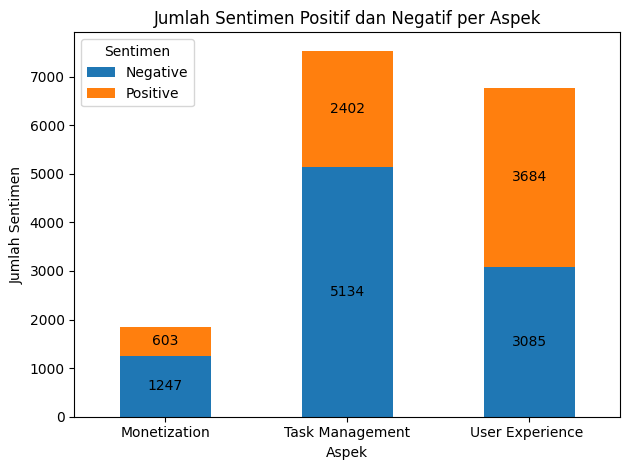

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah sentimen positif dan negatif berdasarkan aspek
sentiment_counts_by_aspect = bert.groupby(['Aspect', 'Sentiment']).size().unstack(fill_value=0)

# Buat bar chart
ax = sentiment_counts_by_aspect.plot(kind='bar', stacked=True)
plt.title('Jumlah Sentimen Positif dan Negatif per Aspek')
plt.xlabel('Aspek')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=0)  # Rotasi label x agar lebih mudah dibaca
plt.legend(title='Sentimen')

# Tambahkan label nilai di tengah setiap bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_x(), p.get_y()
    ax.annotate(f"{int(height)}", (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()


In [ ]:
bert['Sentiment'].value_counts()

Sentiment
Negative    9466
Positive    6689
Name: count, dtype: int64

In [ ]:
bert['Aspect'].value_counts()

Aspect
Task Management     7536
User Experience     6769
Monetization        1850
Name: count, dtype: int64

# Testing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv('label_sentiment_bert_kaggle.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Content'], data['Sentiment'], test_size=0.15, random_state=42)


In [ ]:
jumlah_positif_latih = y_train.value_counts()[1]
jumlah_negatif_latih = y_train.value_counts()[0]
jumlah_positif_uji = y_test.value_counts()[1]
jumlah_negatif_uji = y_test.value_counts()[0]


In [ ]:
print('Data Latih:')
print('  Jumlah Positif:', jumlah_positif_latih)
print('  Jumlah Negatif:', jumlah_negatif_latih)

print('Data Uji:')
print('  Jumlah Positif:', jumlah_positif_uji)
print('  Jumlah Negatif:', jumlah_negatif_uji)


Data Latih:
  Jumlah Positif: 5669
  Jumlah Negatif: 8062
Data Uji:
  Jumlah Positif: 1020
  Jumlah Negatif: 1404


# Visualisasi Data

## Distibusi Aspek Data Kaggle

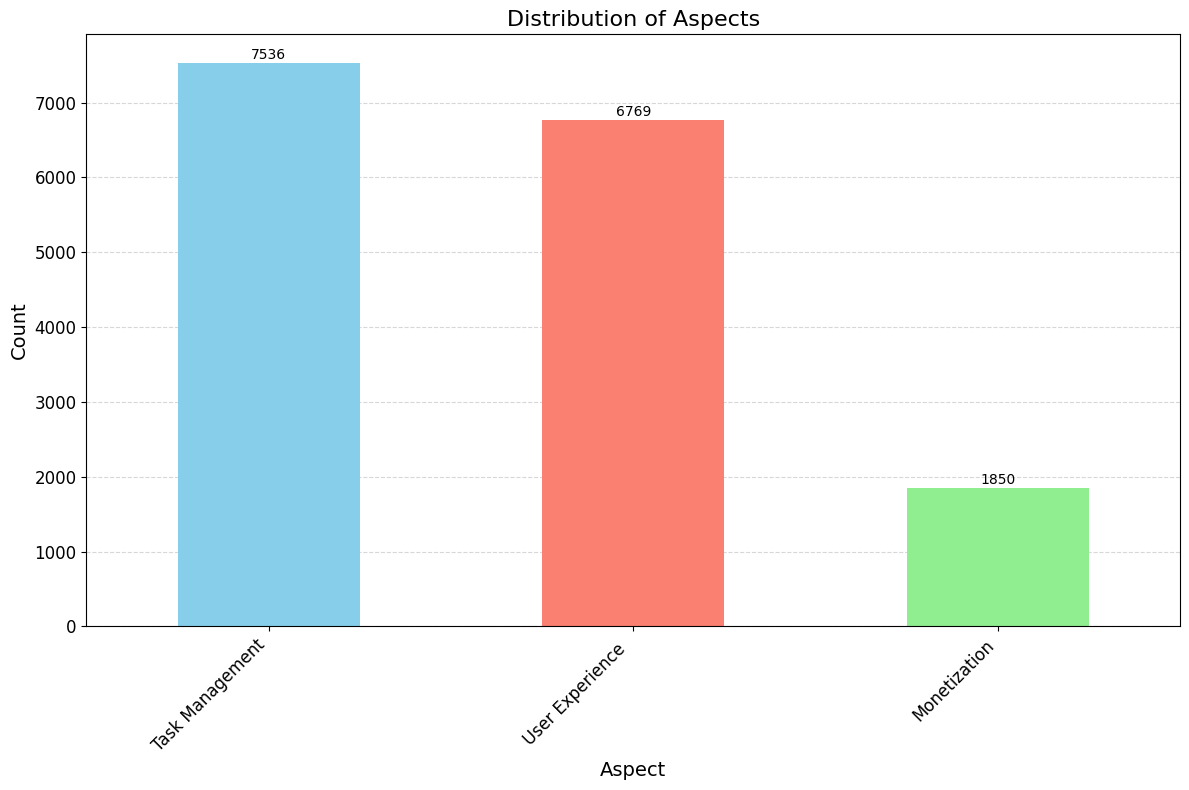

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path untuk file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_aspek_kaggle.csv'

# Load data dari Google Drive
data = pd.read_csv(path)

# Get value counts of 'Aspect'
aspect_counts = data['Aspect'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 8))
aspect_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Distribution of Aspects', fontsize=16)
plt.xlabel('Aspect', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)  # Ensure grid is behind the bars
for i, count in enumerate(aspect_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

## Distribusi Sentiment Data Kaggle

### Sentiment Vader - Data Kaggle

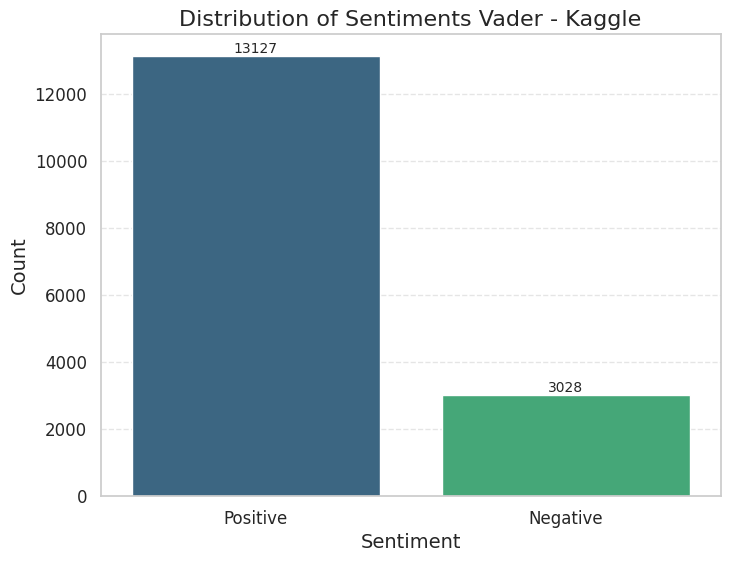

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path untuk file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_sentiment_vader_kaggle.csv'

# Load data dari Google Drive
data = pd.read_csv(path)

# Get value counts of 'Sentiment'
sentiment_counts = data['Sentiment'].value_counts()

# Set the style
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribution of Sentiments Vader - Kaggle', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add count labels on top of each bar
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()


### Sentiment Blob - Data Kaggle

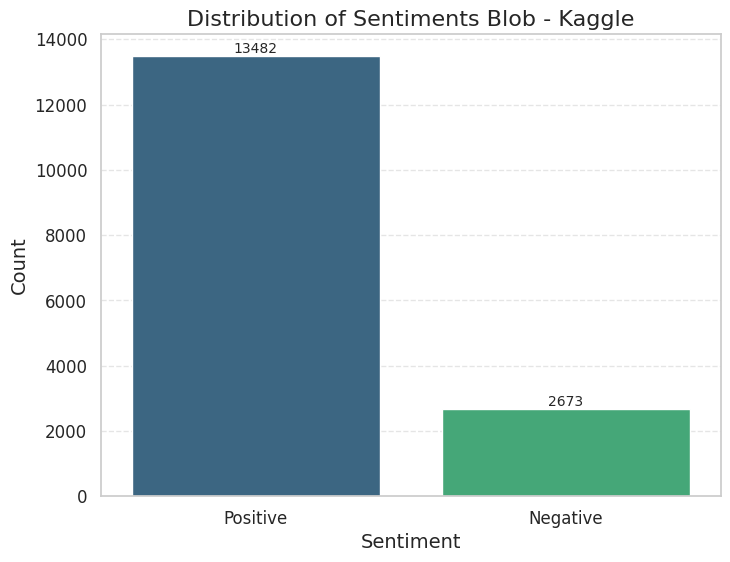

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path untuk file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_sentiment_blob_kaggle.csv'

# Load data dari Google Drive
data = pd.read_csv(path)

# Get value counts of 'Sentiment'
sentiment_counts = data['Sentiment'].value_counts()

# Set the style
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribution of Sentiments Blob - Kaggle', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add count labels on top of each bar
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()


### Sentiment BERT - Data Kaggle

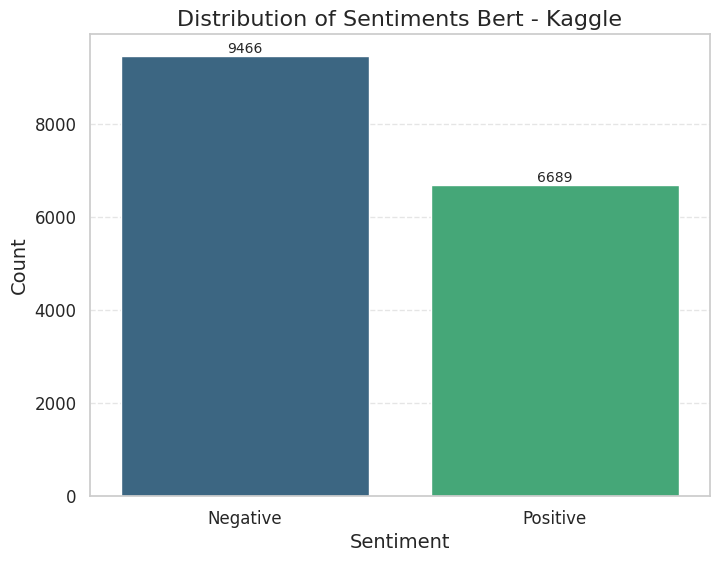

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path untuk file CSV di Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/Resha Ananda Rahman (ABSA)/Data Kaggle/label_aspek_kaggle.csv'

# Load data dari Google Drive
data = pd.read_csv(path)

# Get value counts of 'Sentiment'
sentiment_counts = data['Sentiment'].value_counts()

# Set the style
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribution of Sentiments Bert - Kaggle', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add count labels on top of each bar
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()


## Distribusi Data Wordcloud
